In [107]:
import pickle
import networkx as nx
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import datetime as dt

In [108]:
plt.style.use('ggplot')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [6]:
k = '3'

In [25]:
G = pickle.load(open(f'graphs/G_{k}.pickle', 'rb'))
unique_parties = list(set(dict(G.nodes(data='party')).values()))
unique_parties # unique party in the whole tenure

['PSL',
 'SKL',
 'SLD',
 'PiS',
 'AWS',
 'PP',
 'KdP',
 'ROP',
 'niez.',
 'UW',
 'KPN-OP',
 'Alternatyw',
 'ROP-PC']

In [18]:
Gs = []
dates = []
for file_path in os.listdir(f'./graphs/{k}_monthly'):
    G = pickle.load(open(f'graphs/{k}_monthly/{file_path}', 'rb'))
    Gs.append(G)
    date = file_path[-14:-7]
    dates.append(date)

In [30]:
d_int_list = []
d_ext_list = []

for party in tqdm(unique_parties):
    d_int_party = []
    d_ext_party = []
    for G in Gs:
        adj_matrix = nx.adjacency_matrix(G)
        
        C_ids = []
        for node_id, node_party in dict(G.nodes(data='party')).items():
            if party == node_party:
                C_ids.append(node_id)
                
        if len(C_ids) == 0:
            d_int_party.append(None)
            d_ext_party.append(None)
        else:
            C = G.subgraph(C_ids)
            C_adj_matrix = nx.adjacency_matrix(C)
            n_C = C.number_of_nodes()
            d_int = np.sum(C_adj_matrix) / (n_C * (n_C-1))
            d_int_party.append(d_int)


            not_C_ids = list(set(G.nodes()).difference(set(C_ids)))
            n_not_C = len(not_C_ids) 
            d_ext = 0
            for i_node in C_ids:
                for j_node in not_C_ids:
                    d_ext += adj_matrix[i_node, j_node]
            d_ext = d_ext / (n_C * n_not_C)
            d_ext_party.append(d_ext)
    
    d_int_list.append(d_int_party)
    d_ext_list.append(d_ext_party)

100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [07:08<00:00, 32.94s/it]


In [32]:
d_avg_list = []
for G in tqdm(Gs):
    adj_matrix = nx.adjacency_matrix(G)
    n = G.number_of_nodes()
    d_avg = np.sum(adj_matrix) / (n * (n-1))
    d_avg_list.append(d_avg)

100%|██████████████████████████████████████████████████████████████████████████████████| 46/46 [00:22<00:00,  2.05it/s]


In [63]:
dates_list = [dt.datetime.strptime(date, '%Y_%m').date() for date in dates]

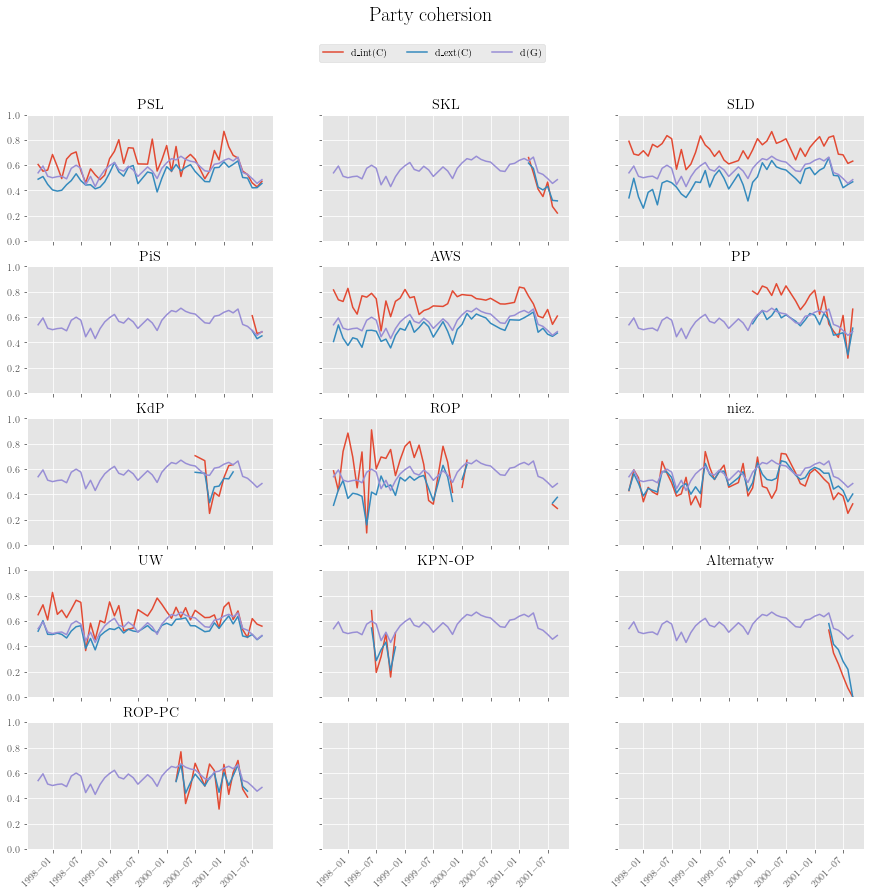

In [116]:
fig, axs = plt.subplots(5, 3, figsize=(15, 15), sharex=True,sharey=True)
fig.autofmt_xdate(bottom=0.2, rotation=45, ha='right')
axs = axs.reshape(-1)
for i in range(len(unique_parties)):
    party = unique_parties[i]

    axs[i].plot(dates_list, d_int_list[i], label=r"$d_{int}(C)$")
    axs[i].plot(dates_list, d_ext_list[i], label=r"$d_{ext}(C)$")
    axs[i].plot(dates_list, d_avg_list, label=r"$d(G)$")
    axs[i].set_title(party)
    axs[i].set_ylim([0, 1])

fig.legend([r'd_int(C)', r'd_ext(C)', r'd(G)'], loc='upper center', ncol=3, bbox_to_anchor=(0.5, 0.95), fontsize=10)
fig.suptitle('Party cohersion', fontsize=20)
plt.show()

import igraph as ig
- rewrite this program using igraph (faster than networkx)